#Random forest

Random Forest is a widely-used machine learning algorithm. It combines the output of multiple decision trees to reach a single result.

In this assignment we wull use RandomForest algorithm to analyze given datasets, extracting meaningful insights, and predicting outcomes based on the decision rules learned from the data.

For this assignment, we will use "Stroke Prediction Dataset" downloaded from Kaggle (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data)

# **Stroke**

Stroke ranks as the second leading cause of death worldwide and is a major contributor to disability, thereby imposing significant economic burdens.

Strokes are caused by blocked blood flow to the brain (ischemic stroke) or sudden bleeding in the brain (hemorrhagic stroke). Many things raise your risk of stroke such as High blood pressure, Obesity, High cholesterol, Smoking, Age, Anxiety/depression, Family history, Sex, etc.

# **Dataset**

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

The data contains 5110 observations with 12 attributes.

**Attribute Information**

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"


10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this .





In [65]:
# Import the necessary liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [66]:
# Load the dataset
df = pd.read_csv("dataset_stroke_data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#EDA

In [67]:
# Check the shape of dataframe
df.shape

(5110, 12)

In [68]:
df.columns


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [69]:
# Drop "id" column as it has no contribution in predction of stroke.
df_clean_1 = df.drop("id", axis=1)
df_clean_1.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [70]:
# Check for null values
df_clean_1.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


We can observe from the above output that the column "bmi" has 201 null values. Since our DataFrame consists of 5110 rows, and dropping 201 rows with null values would not make a significant impact on data. Therefore, we will drop all the rows containing null values as it can impact our model performance.

In [71]:
# Drop the rows where at least one element is missing.
df_clean_2 = df_clean_1.dropna()
df_clean_2.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [72]:
df_clean_2.shape

(4909, 11)

In [73]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


As the columns "gender", "ever_married", "work_type", "Residence_type" and "smoking_status" contain information in objects (categorical variables); therefore, we will convert categorical variable into numerical.

We will use the Pandas DataFrame replace() function to replace the categorical variable with numerical value.

In [74]:
# Check the unique values in columns "gender", "ever_married", "work_type", "Residence_type" and "smoking_status".
# The below code will show the unique values in all the above mentioned columns in one step.
unique_values = {column: df_clean_2[column].unique() for column in ["gender",
                                                            "ever_married",
                                                            "work_type",
                                                            "Residence_type",
                                                            "smoking_status"]}
unique_values

{'gender': array(['Male', 'Female', 'Other'], dtype=object),
 'ever_married': array(['Yes', 'No'], dtype=object),
 'work_type': array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
       dtype=object),
 'Residence_type': array(['Urban', 'Rural'], dtype=object),
 'smoking_status': array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
       dtype=object)}

In [75]:
# Replace the categorical values in these columns with numerical values.
# The below code will replace the categorical values with numerical values in all the above mentioned columns in one step.
df_final = df_clean_2.replace({'gender': {'Male': 0, 'Female': 1, 'Other': 2},
                  'ever_married': {'Yes': 1, 'No': 0},
                   'work_type': {'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4},
                   'Residence_type': {'Urban': 0, 'Rural': 1},
                   'smoking_status':{'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3}})

In [76]:
# Check the unique values in final dataframe (df_final) after replacement
unique_values_df_final = {column: df_final[column].unique() for column in ["gender",
                                                            "ever_married",
                                                            "work_type",
                                                            "Residence_type",
                                                            "smoking_status"]}
# Check the unique values in final data (ie, df_final)
unique_values_df_final

{'gender': array([0, 1, 2]),
 'ever_married': array([1, 0]),
 'work_type': array([0, 1, 2, 3, 4]),
 'Residence_type': array([0, 1]),
 'smoking_status': array([0, 1, 2, 3])}

In [77]:
# Check the details of final data.
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int64  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int64  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 460.2 KB


The above output confirms that all the categorical variables have been replaced with numerical values.

# **RandomForestClassifier**

In [78]:
# Define input (x) and output (y) parameters
x = df_final.drop("stroke", axis = 1)
y = df_final["stroke"]

In [79]:
# Perform train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 5)

In [80]:
# Creating the model
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [81]:
# Making the predictions
y_pred = clf.predict(x_test)

In [82]:
# Evaluating the model
accuracy = np.round(metrics.accuracy_score(y_test, y_pred), 2)
precision = np.round(metrics.precision_score(y_test, y_pred), 2)
recall = np.round(metrics.recall_score(y_test, y_pred), 2)
f1_score = np.round(metrics.f1_score(y_test, y_pred), 2)

print(accuracy)
print(precision)
print(recall)
print(f1_score)

0.96
0.33
0.02
0.03


# **Hyperparameter tuning**

In [83]:
# importing liberaries
from sklearn.model_selection import GridSearchCV

In [84]:
# Creatiing parameter dictionary
param = {'n_estimators': list(range(100, 200, 500)),
         'criterion': ['gini', 'entropy'],
         'min_samples_split': list(range(2, 10)),
         'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.1],
         'max_features': ['auto', 'sqrt']}

In [85]:
# Optimizing the algorithm
grid_search = GridSearchCV(clf, param, cv = 5, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt'],
                         'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.1],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [100]},
             verbose=1)

In [86]:
# Getting the best parameters
print(grid_search.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt', 'min_impurity_decrease': 0.0001, 'min_samples_split': 2, 'n_estimators': 100}


In [87]:
# Print the best accuracy
print(grid_search.best_score_)

0.9566356927659863


In [98]:
# Use the best parameters to creat optimal model
clf_opt = RandomForestClassifier(criterion = 'gini',
                                 max_features = 'sqrt',
                                 min_impurity_decrease = 0.0001,
                                 min_samples_split = 2,
                                 n_estimators = 100)

clf_opt.fit(x_train, y_train)

RandomForestClassifier(min_impurity_decrease=0.0001)

In [99]:
# Taking the predictions from optimal model
y_pred_opt = clf_opt.predict(x_test)

In [100]:
# Evaluating the optimal model
accuracy_opt = np.round(metrics.accuracy_score(y_test, y_pred_opt), 2)
precision_opt = np.round(metrics.precision_score(y_test, y_pred_opt), 2)
recall_opt = np.round(metrics.recall_score(y_test, y_pred_opt), 2)
f1_score_opt = np.round(metrics.f1_score(y_test, y_pred_opt), 2)

print(accuracy_opt)
print(precision_opt)
print(recall_opt)
print(f1_score_opt)

0.96
0.0
0.0
0.0


Results of the model evaluation shows 96% accuracy; however, remaining evaluation scores has no values even after model optimization.

**Let’s try to find the cause behind this difference in evaluation scores.**

In [101]:
# Check the counts of variable in column "stroke"
df_final["stroke"].value_counts()

,count
stroke,
0,4700
1,209


In [102]:
# Check the variable in test data (y_test)
y_test.value_counts()

,count
stroke,
0,1413
1,60


As we can see in the above results that class (0) outweighs the other class (ie, 1) in the stroke column.

Therefore, the "0.0" scores for precision, recall, and F1 score are likely due to the class imbalance in this dataset. Due to this class imbalance, the model might not correctly predict instances of the minority class ("1").

Let’s try to resolve this issue by adjusting the weights for precision, recall and f1 score.

Lets check the evaluation score of first model (created without parameter tuning) and optimal model (created with best parameters)by adjusting the weights.

In [103]:
# First model accuracy by adjusting weights
accuracy = np.round(metrics.accuracy_score(y_test, y_pred,), 2)
precision_wt = np.round(metrics.precision_score(y_test, y_pred, average='weighted'), 2)
recall_wt = np.round(metrics.recall_score(y_test, y_pred, average='weighted'), 2)
f1_score_wt = np.round(metrics.f1_score(y_test, y_pred, average='weighted'), 2)

print(accuracy)
print(precision_wt)
print(recall_wt)
print(f1_score_wt)

0.96
0.93
0.96
0.94


In [104]:
# Optimal model accuracy by adjusting weights
accuracy_opt = np.round(metrics.accuracy_score(y_test, y_pred_opt), 2)
precision_opt_wt = np.round(metrics.precision_score(y_test, y_pred_opt, average='weighted'), 2)
recall_opt_wt = np.round(metrics.recall_score(y_test, y_pred_opt, average='weighted'), 2)
f1_score_opt_wt = np.round(metrics.f1_score(y_test, y_pred_opt, average='weighted'), 2)

print(accuracy)
print(precision_opt_wt)
print(recall_opt_wt)
print(f1_score_opt_wt)

0.96
0.92
0.96
0.94


The above results show that there is no significant difference in performance of model after hyperparameter tuning.

# **Visualize the prediction results using confusion matrix**

In [105]:
# Import the confusion matrix
from sklearn.metrics import confusion_matrix

In [110]:
# Getting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1411    2]
 [  59    1]]


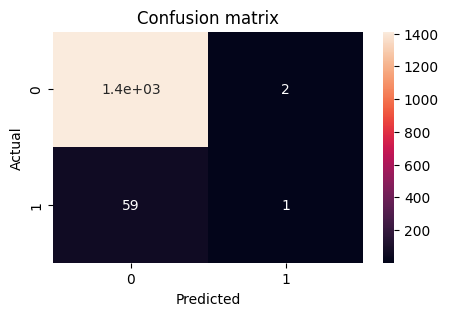

In [111]:
# Visualize the confusion matrix as heatmap.
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

The above output indicates that the model missed to predict a significant number of positive instances (ie, where the patient actually had stroke; however, the model predicted as "no stroke").

This might be due to the class imbalance in dataset because of which the model could not identify the pattern as it received a very less data of patients with stroke.

..........................................................................................................END.......................................................................................................